In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Embedding,Dropout
from tensorflow.keras.callbacks import EarlyStopping as ES
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler as SS,OneHotEncoder as OHE,OrdinalEncoder as OE,LabelEncoder as LE
from sklearn.compose import ColumnTransformer as CT
from sklearn.pipeline import Pipeline as PP
from sklearn.metrics import accuracy_score as AS
from sklearn.model_selection import GridSearchCV as GSCV,train_test_split as TTS
import seaborn as sn
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.ensemble import RandomForestClassifier as RFC,StackingClassifier as SC
from sklearn.linear_model import LogisticRegression as LO
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

In [3]:
t=pd.read_csv("telecom_customer_churn.csv")

In [4]:
t.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
t=t[t["Customer Status"]!="Joined"]

In [6]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   objec

In [7]:
t.drop(["Customer ID","Gender","Churn Category","Churn Reason","Age","City","Zip Code","Latitude","Longitude","Paperless Billing","Payment Method"],axis=1,inplace=True)

In [8]:
t["Customer Status"].unique()

array(['Stayed', 'Churned'], dtype=object)

In [9]:
t.head()

,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,83.9,267.40,0.00,0,22.14,289.54,Churned


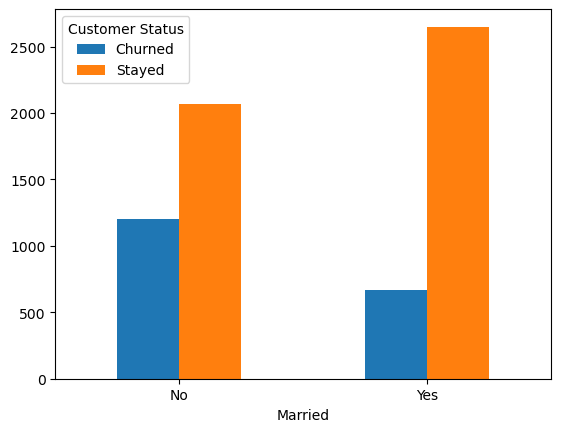

In [10]:
pd.crosstab(index=t['Married'], columns=t["Customer Status"]).plot(kind="bar",rot=0);

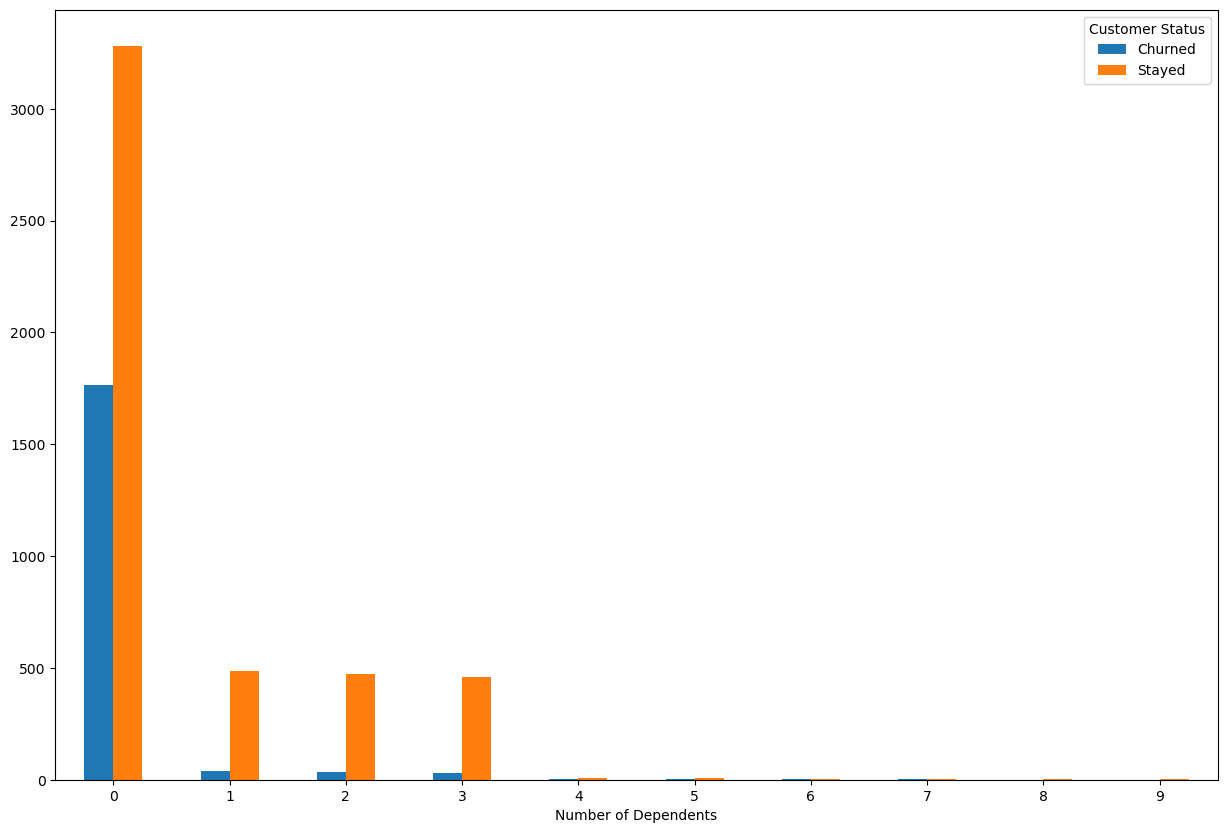

In [11]:
pd.crosstab(index=t["Number of Dependents"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

In [12]:
t.head()

,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,83.9,267.40,0.00,0,22.14,289.54,Churned


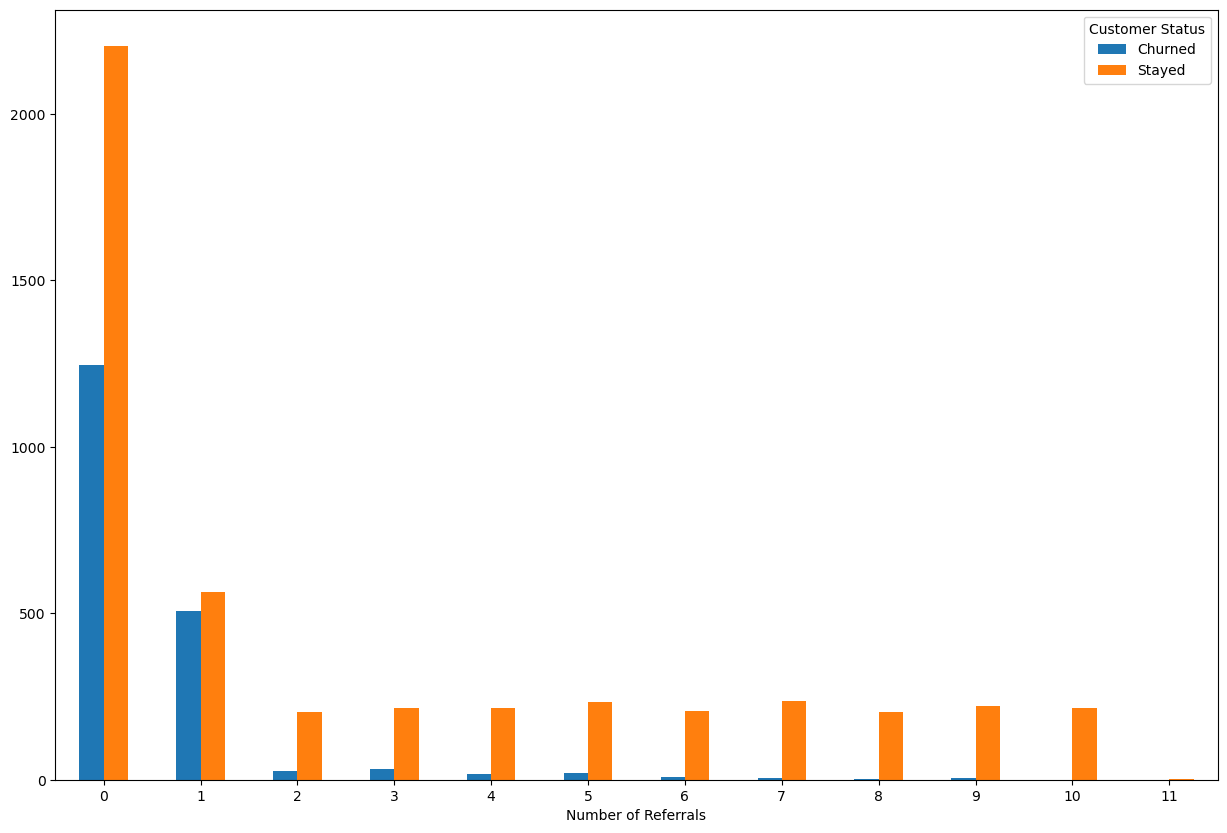

In [13]:
pd.crosstab(index=t["Number of Referrals"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

In [14]:
t["Tenure in Months"].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34, 45,  1, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42], dtype=int64)

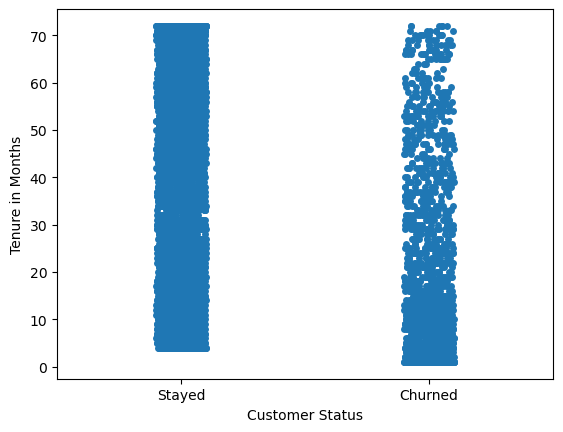

In [15]:
sn.stripplot(x=t["Customer Status"],y=t["Tenure in Months"]);

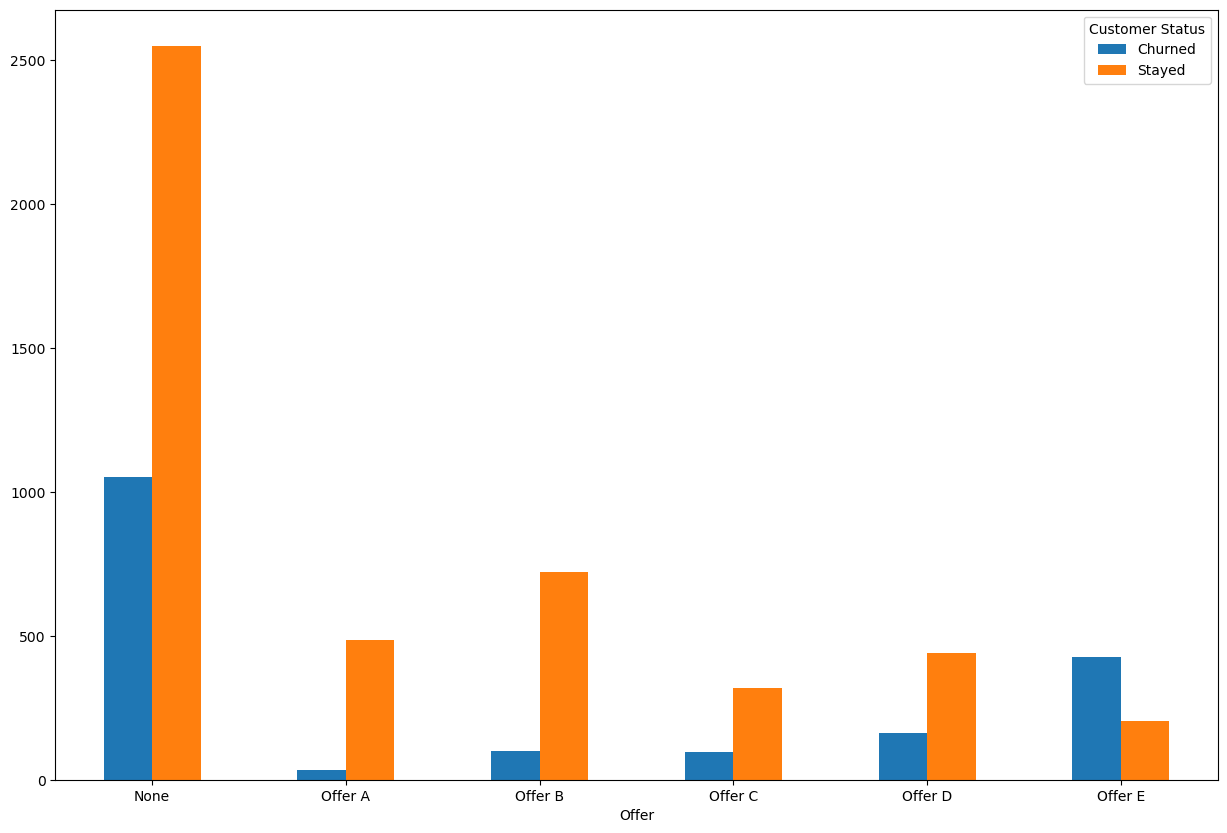

In [16]:
pd.crosstab(index=t["Offer"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

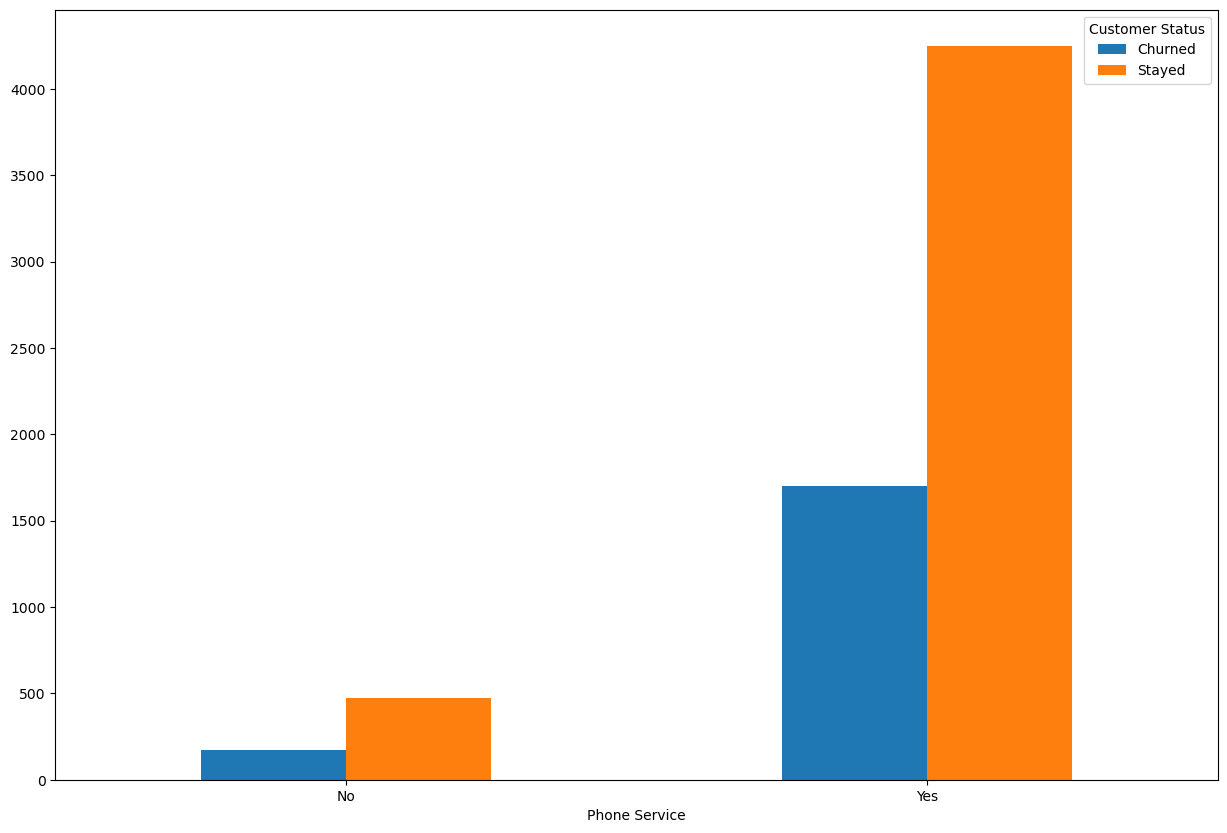

In [17]:
pd.crosstab(index=t["Phone Service"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

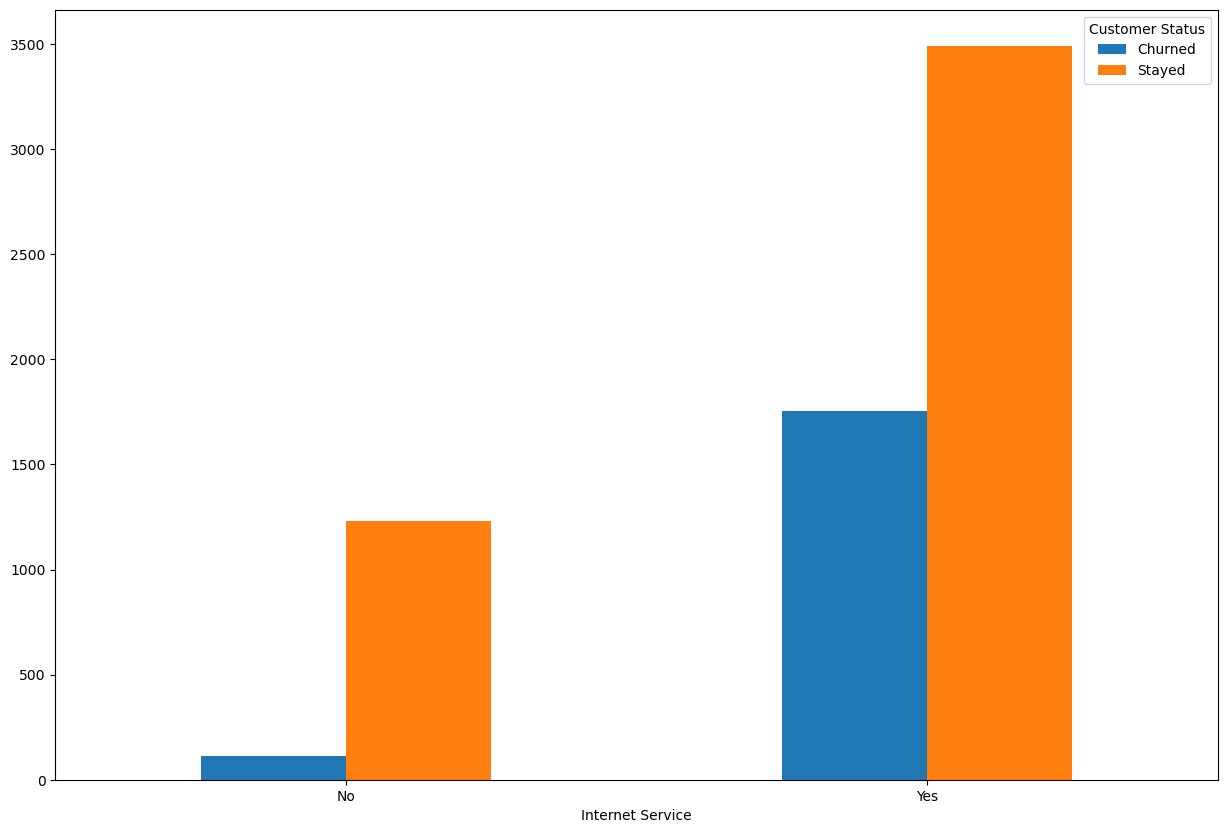

In [18]:
pd.crosstab(index=t["Internet Service"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

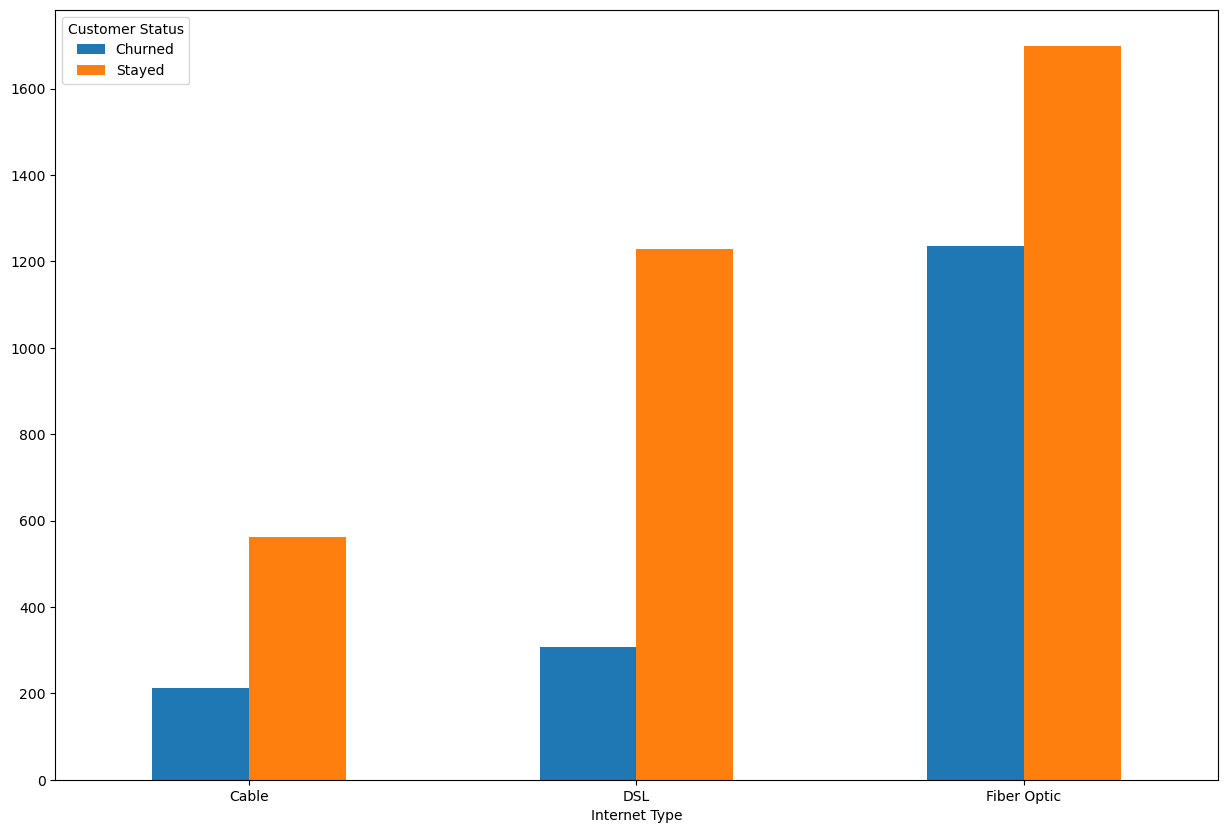

In [19]:
pd.crosstab(index=t["Internet Type"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

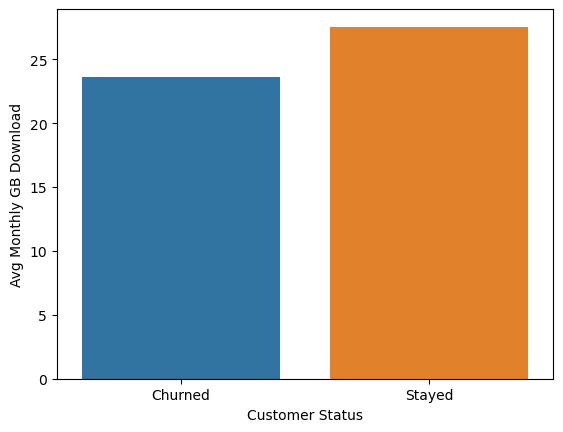

In [20]:
sn.barplot(x=t.groupby("Customer Status")["Avg Monthly GB Download"].mean().index,y=t.groupby("Customer Status")["Avg Monthly GB Download"].mean());

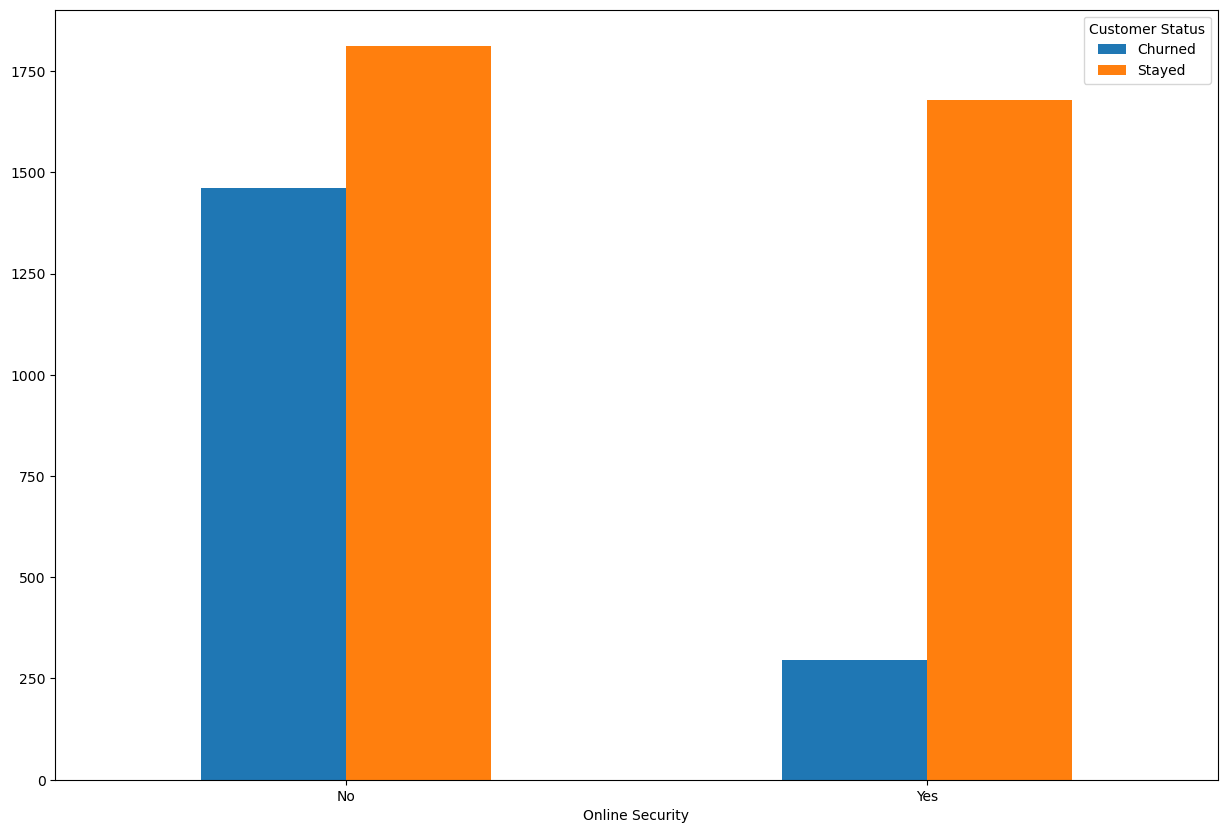

In [21]:
pd.crosstab(index=t["Online Security"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

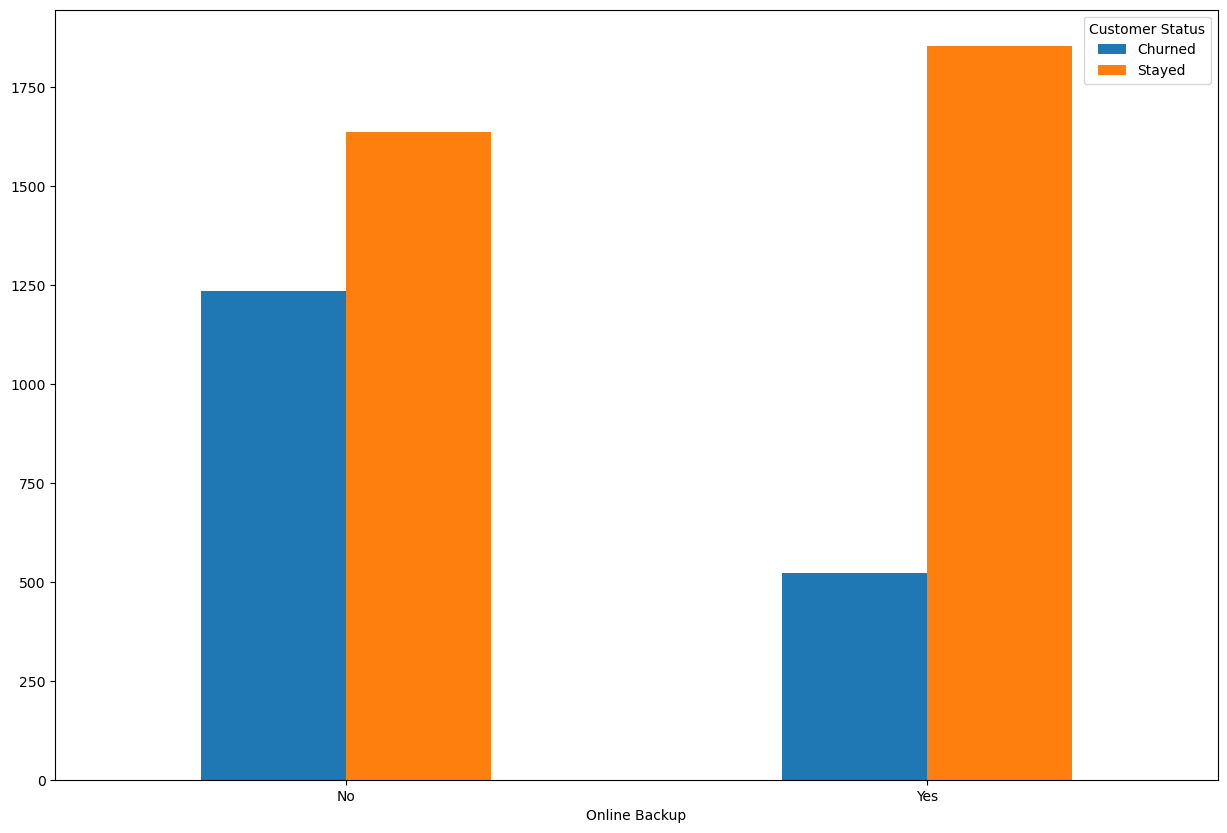

In [22]:
pd.crosstab(index=t["Online Backup"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

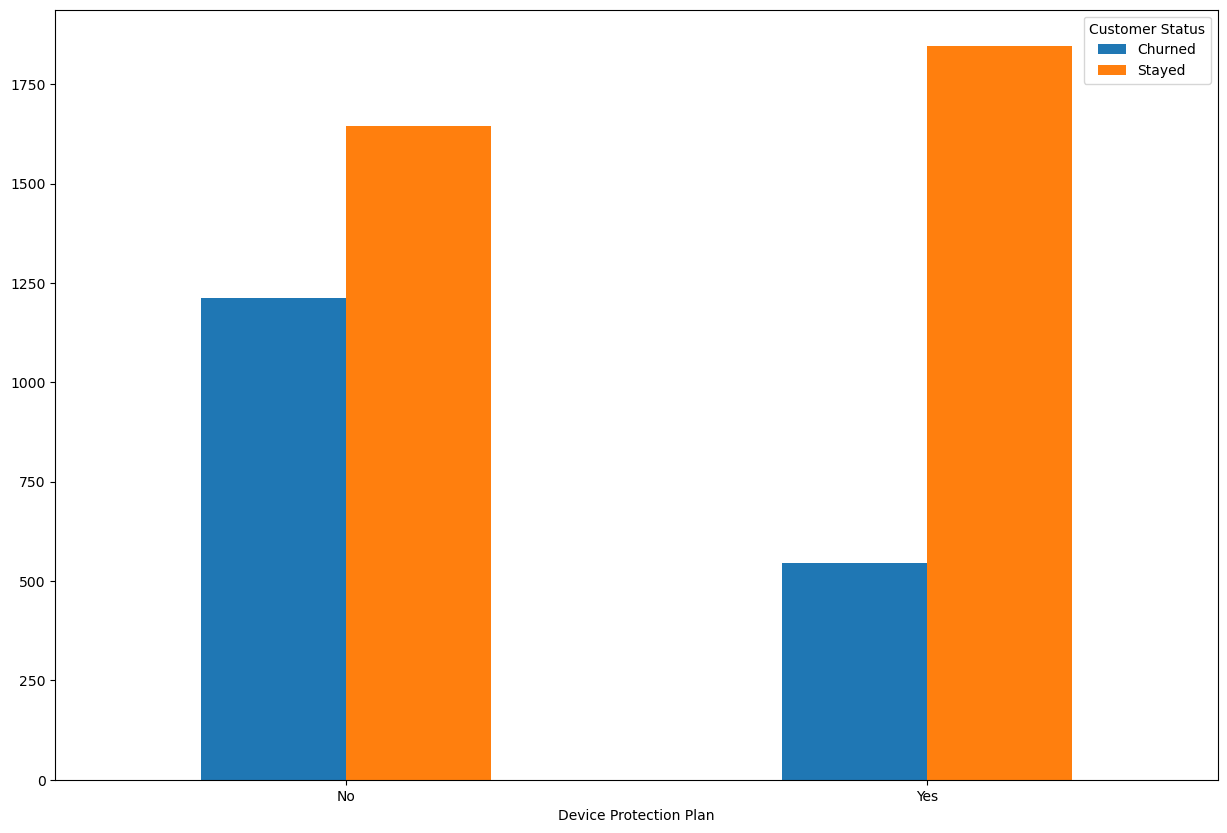

In [23]:
pd.crosstab(index=t["Device Protection Plan"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

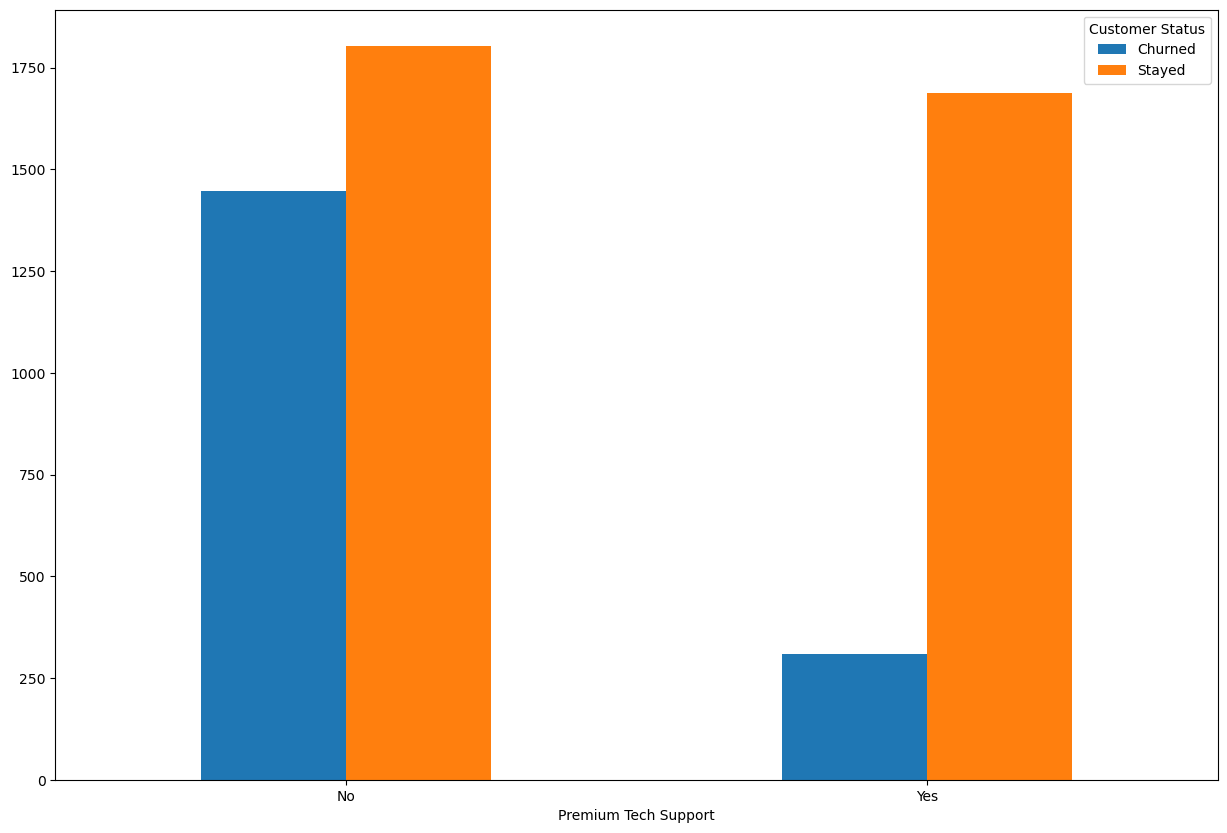

In [24]:
pd.crosstab(index=t["Premium Tech Support"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

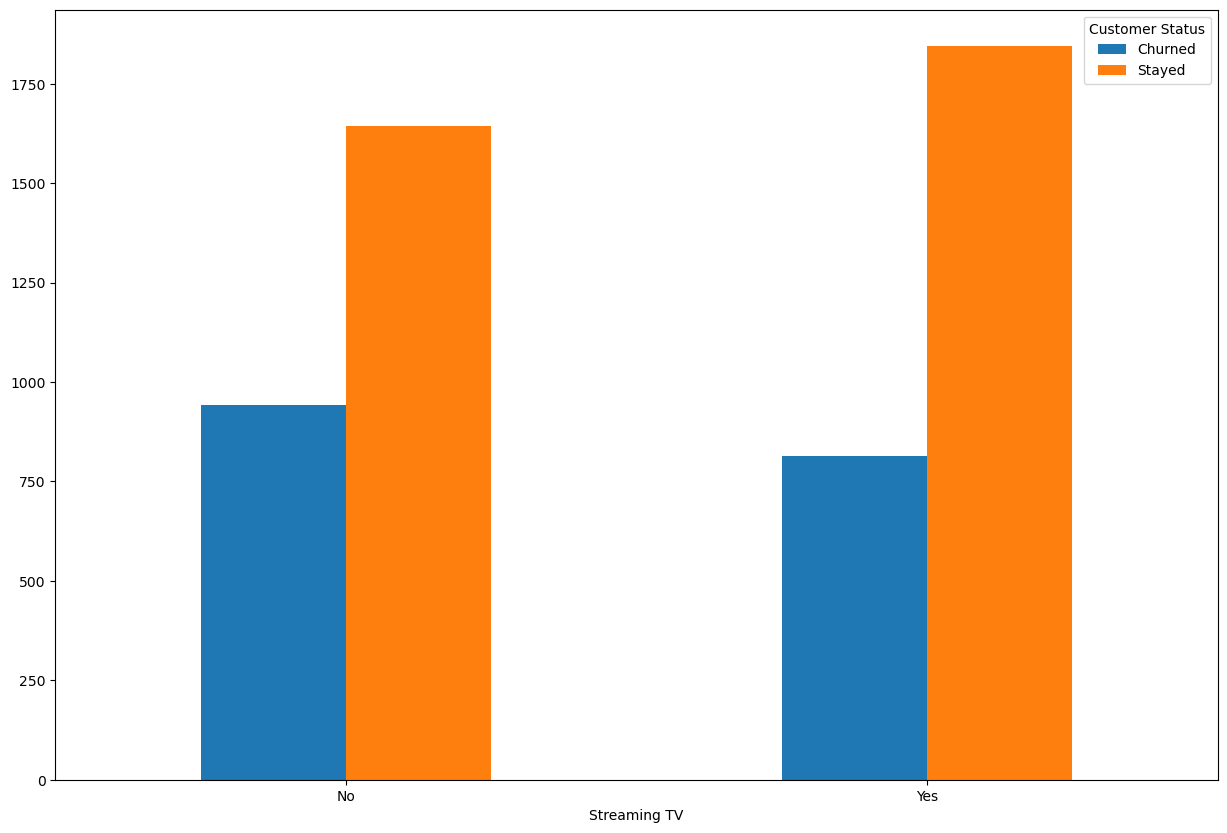

In [25]:
pd.crosstab(index=t["Streaming TV"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

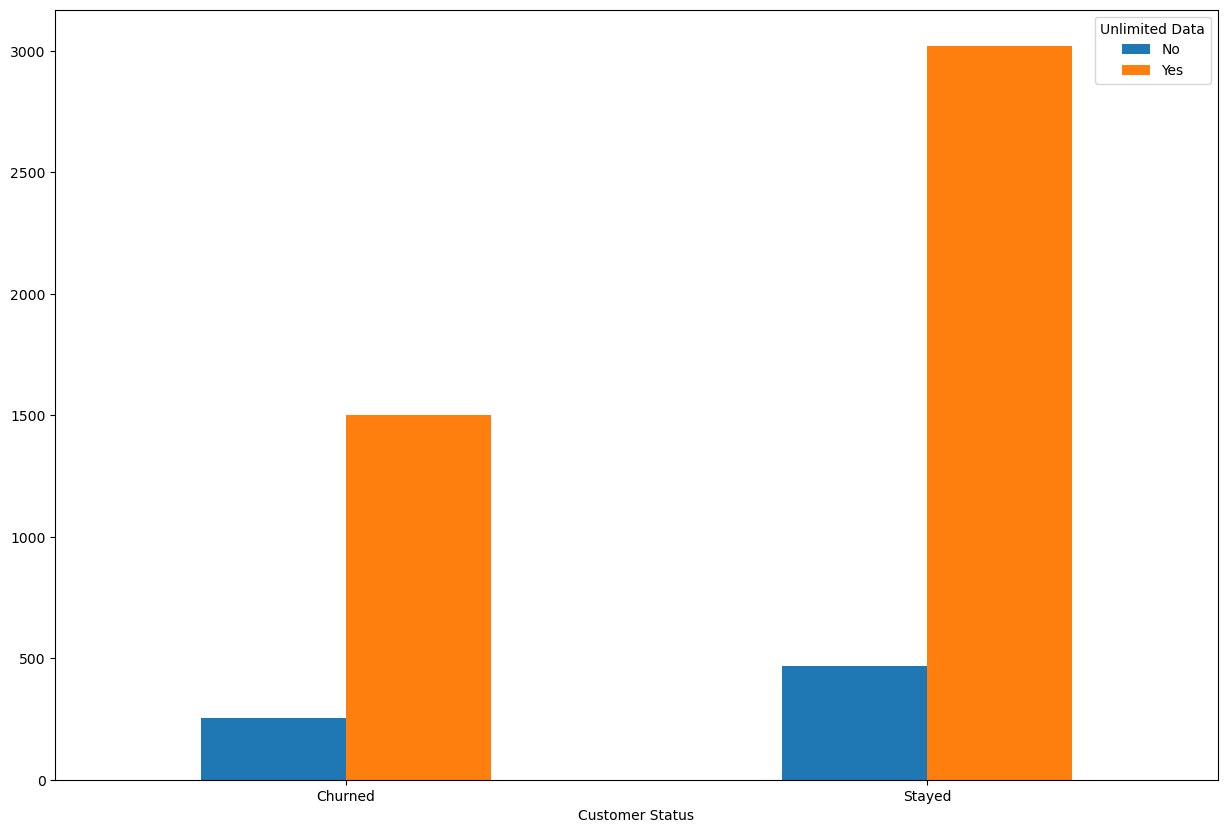

In [26]:
pd.crosstab(index=t["Customer Status"], columns=t["Unlimited Data"]).plot(kind="bar",rot=0,figsize=(15,10));

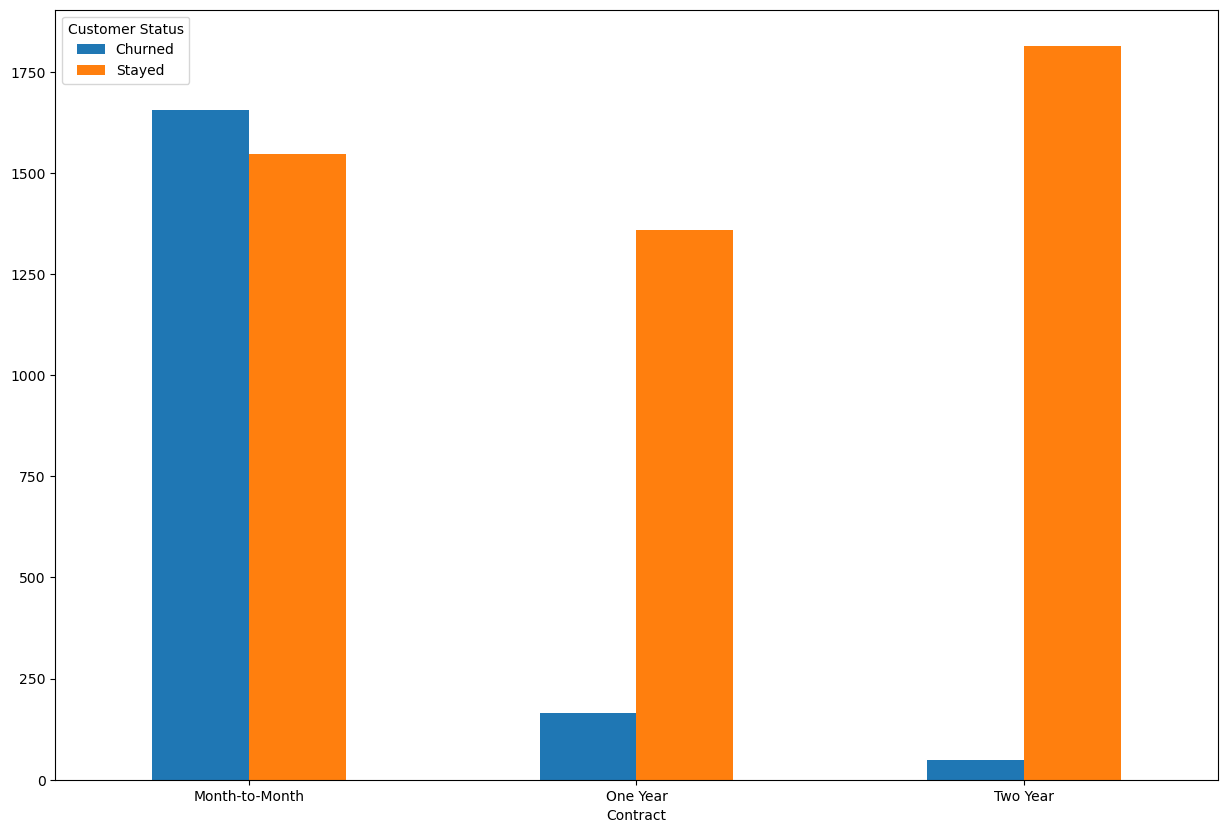

In [27]:
pd.crosstab(index=t["Contract"], columns=t["Customer Status"]).plot(kind="bar",rot=0,figsize=(15,10));

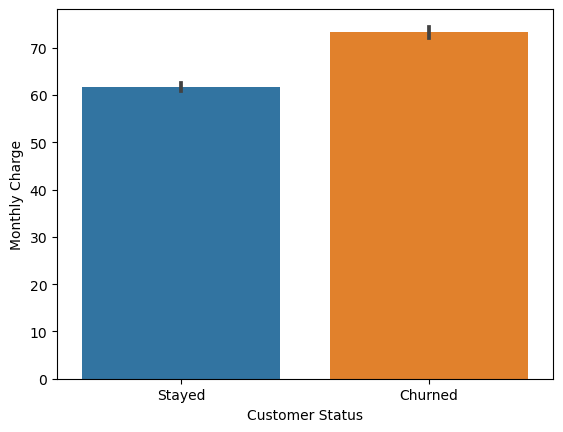

In [28]:
sn.barplot(x=t["Customer Status"],y=t["Monthly Charge"]);

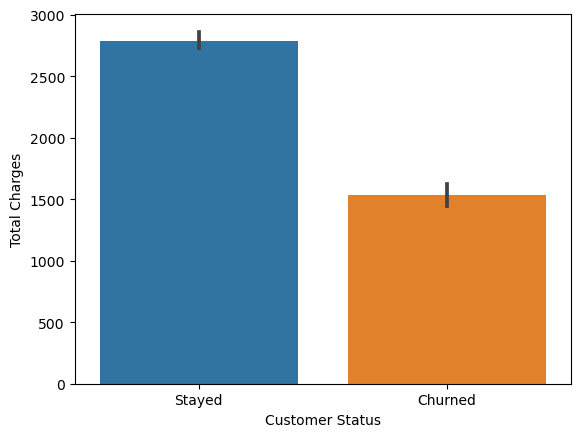

In [29]:
sn.barplot(x=t["Customer Status"],y=t["Total Charges"]);

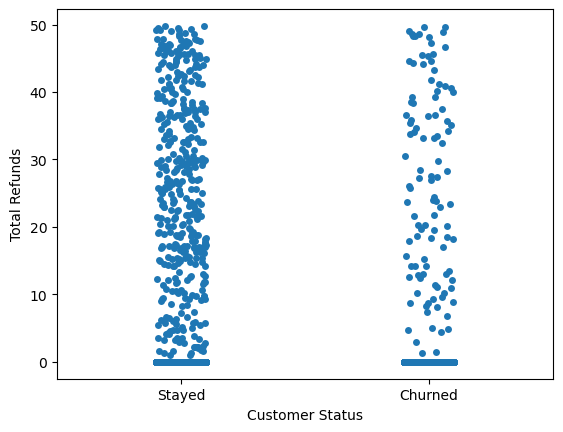

In [30]:
sn.stripplot(x=t["Customer Status"],y=t["Total Refunds"]);

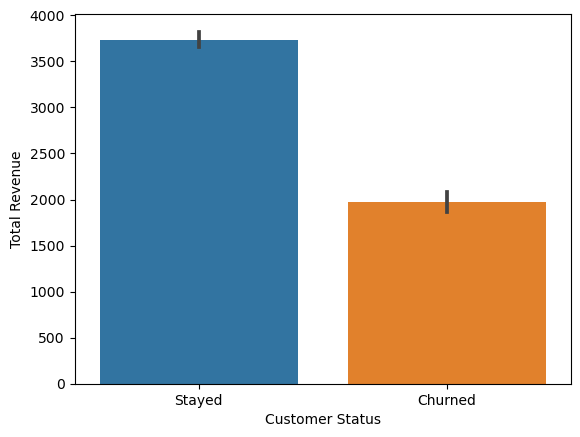

In [31]:
sn.barplot(x=t["Customer Status"],y=t["Total Revenue"]);

In [32]:
t.dropna(inplace=True)


In [33]:
t.isnull().sum()

Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue            

In [34]:
t.duplicated().sum()

0

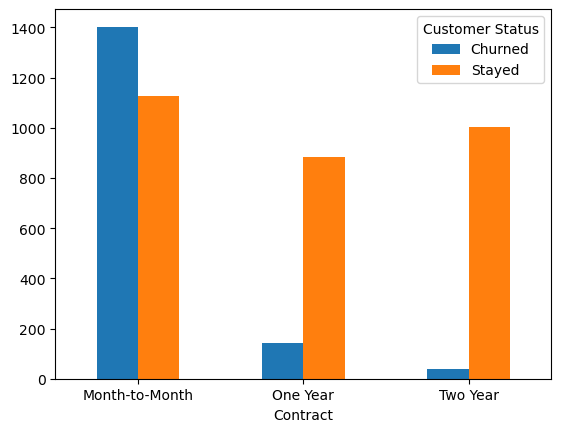

In [35]:
pd.crosstab(index=t["Contract"], columns=t["Customer Status"]).plot(kind="bar",rot=0);

In [36]:
Offer=["None","Offer E","Offer D","Offer C","Offer B","Offer A"]
Internet_Type=['Fiber Optic','DSL','Cable']
Contract=['Month-to-Month','One Year','Two Year']

ct=CT(
[
    ("OE",OE(categories=[Offer,Internet_Type,Contract]),["Offer","Internet Type","Contract"]),
    ("OHE",OHE(),[0,5,7,8,11,12,13,14,15,16,17,18])
],remainder="passthrough")

In [37]:
x=t.drop("Customer Status",axis=1)
x

,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,65.60,593.30,0.00,0,381.51,974.81
1,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,-4.00,542.40,38.33,10,96.21,610.28
2,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,73.90,280.85,0.00,0,134.60,415.45
3,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,98.00,1237.85,0.00,0,361.66,1599.51
4,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,No,0,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42.0,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,94.05,633.45,0.00,0,255.43,888.88
7036,No,0,0,1,Offer E,Yes,42.09,No,Yes,Fiber Optic,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,70.15,70.15,0.00,0,42.09,112.24
7038,No,0,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,55.15,742.90,0.00,0,606.84,1349.74
7039,Yes,0,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,85.10,1873.70,0.00,0,356.40,2230.10


In [61]:
le=LE()
y=le.fit_transform(t.loc[:,"Customer Status"])

In [62]:
xta,xte,yta,yte=TTS(x,y,random_state=2,test_size=0.2)

# Machine Learning

In [63]:
p={
    "RFC__n_estimators":[20,50,100],
    "RFC__criterion":["gini","entropy"],
    "RFC__max_depth":[None,5,6,7,8,9,10],
    "RFC__max_features":["sqrt","log2",None]
}

In [64]:
pp=PP(
[
    ("ct",ct),
    ("ss",SS()),
    ("RFC",RFC())
],verbose=True)
gscv1=GSCV(pp,param_grid=p,cv=5,n_jobs=-1)
gscv1.fit(xta,yta)

[Pipeline] ................ (step 1 of 3) Processing ct, total=   0.0s
[Pipeline] ................ (step 2 of 3) Processing ss, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing RFC, total=   0.5s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OE',
                                                                         OrdinalEncoder(categories=[['None',
                                                                                                     'Offer '
                                                                                                     'E',
                                                                                                     'Offer '
                                                                                                     'D',
                                                                                                     'Offer '
                                                                                                     'C',
                                                                                                     'Offer '
                                                                                                     'B',
                                                                                                     'Offer '
                                                                                                     'A'],
                                                                                                    ['Fiber '
                                                                                                     'Optic',
                                                                                                     'DSL',
                                                                                                     'Cable'],
                                                                                                    ['Month-to-Month',
                                                                                                     'One '
                                                                                                     'Year',
                                                                                                     'Two '
                                                                                                     'Year']]),
                                                                         ['Offer',
                                                                          'Internet '
                                                                          'Type',
                                                                          'Contract']),
                                                                        ('OHE',
                                                                         OneHotEncoder(),
                                                                         [0, 5,
                                                                          7, 8,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18])])),
                                       ('ss', StandardScaler()),
                                       ('RFC', RandomForestClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'RFC__criterion': ['gini', 'entropy'],
               

In [65]:
gscv1.best_score_,AS(yte,gscv1.predict(xte))

(0.8385869565217391, 0.8382193268186754)

In [66]:
gscv1.best_params_

{'RFC__criterion': 'entropy',
 'RFC__max_depth': 10,
 'RFC__max_features': 'sqrt',
 'RFC__n_estimators': 100}

In [67]:
p1={
    "SVC__C":np.arange(0,5),
    "SVC__kernel":["linear","poly","rbf"],
    "SVC__degree":[1,2,3],
    "SVC__gamma":["auto","scale"],
    "SVC__coef0":np.arange(0,5)
}

In [68]:
pp=PP(
[
    ("ct",ct),
    ("SS",SS()),
    ("SVC",SVC())
],verbose=True)
gscv2=GSCV(pp,param_grid=p1,cv=5,n_jobs=-1)
gscv2.fit(xta,yta)

C:\Users\AryanBr0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AryanBr0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AryanBr0\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AryanBr0\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\AryanBr

[Pipeline] ................ (step 1 of 3) Processing ct, total=   0.0s
[Pipeline] ................ (step 2 of 3) Processing SS, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing SVC, total=   0.3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OE',
                                                                         OrdinalEncoder(categories=[['None',
                                                                                                     'Offer '
                                                                                                     'E',
                                                                                                     'Offer '
                                                                                                     'D',
                                                                                                     'Offer '
                                                                                                     'C',
                                                                                                     'Offer '
                                                                                                     'B',
                                                                                                     'Offer '
                                                                                                     'A'],
                                                                                                    ['Fiber '
                                                                                                     'Optic',
                                                                                                     'DSL',
                                                                                                     'Cable'],
                                                                                                    ['Month-to-Month',
                                                                                                     'One '
                                                                                                     'Year',
                                                                                                     'Two '
                                                                                                     'Year']]),
                                                                         ['Offer',
                                                                          'Internet '
                                                                          'Type',
                                                                          'Contract']),
                                                                        ('OHE',
                                                                         OneHotEncoder(),
                                                                         [0, 5,
                                                                          7, 8,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18])])),
                                       ('SS', StandardScaler()),
                                       ('SVC', SVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'SVC__C': array([0, 1, 2, 3, 4]),
                         'SVC__coef0': 

In [69]:
gscv2.best_score_,AS(yte,gscv2.predict(xte))

(0.8258152173913043, 0.8273615635179153)

In [70]:
gscv2.best_params_

{'SVC__C': 3,
 'SVC__coef0': 3,
 'SVC__degree': 2,
 'SVC__gamma': 'auto',
 'SVC__kernel': 'poly'}

In [71]:
sc=SC([
    ("RFC",RFC(**{'criterion': 'entropy','max_depth': 10,'max_features': 'sqrt','n_estimators': 100})),
    ("SVC",SVC(**{'C': 3,'coef0': 3,'degree': 2,'gamma': 'auto','kernel': 'poly'}))
],final_estimator=LO(),passthrough=True,n_jobs=-1)

pp=PP([
    ("ct",ct),
    ("ss",SS()),
    ("sc",sc)
],verbose=True)

gscv=GSCV(pp,param_grid={},cv=5,n_jobs=-1)
gscv.fit(xta,yta)

[Pipeline] ................ (step 1 of 3) Processing ct, total=   0.0s
[Pipeline] ................ (step 2 of 3) Processing ss, total=   0.0s
[Pipeline] ................ (step 3 of 3) Processing sc, total=   1.8s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OE',
                                                                         OrdinalEncoder(categories=[['None',
                                                                                                     'Offer '
                                                                                                     'E',
                                                                                                     'Offer '
                                                                                                     'D',
                                                                                                     'Offer '
                                                                                                     'C',
                                                                                                     'Offer '
                                                                                                     'B',
                                                                                                     'Offer '
                                                                                                     'A'],
                                                                                                    ['Fiber '
                                                                                                     'Optic',
                                                                                                     'DSL',
                                                                                                     'Cable'],
                                                                                                    ['Month-to-Month',
                                                                                                     'One '
                                                                                                     'Year',
                                                                                                     'Two '
                                                                                                     'Year']]),
                                                                         ['Offer',
                                                                          'Internet '
                                                                          'Type',
                                                                          'Contract']),
                                                                        ('OHE',
                                                                         OneHotEncoder(),
                                                                         [0, 5,
                                                                          7, 8,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18])])),
                                       ('ss', StandardScaler()),
                                       ('sc',
                                        StackingClassifier(estimators=[('RFC',
                                                                        RandomForestClassifier(crite

In [72]:
gscv.best_score_,AS(yte,gscv.predict(xte))

(0.8380434782608696, 0.8425624321389794)

# Deep Learning

In [74]:
x=ct.fit_transform(x)
xta,xte,yta,yte=TTS(x,y,random_state=2,test_size=0.2)

In [75]:
ss=SS()
xta=ss.fit_transform(xta)
xte=ss.transform(xte)

In [130]:
model=Sequential()

model.add(Dense(80,activation="relu",input_dim=xta.shape[1]))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(40,activation="relu"))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 80)                2960      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 80)               320       
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 40)                3240      
                                                                 
 dropout_4 (Dropout)         (None, 40)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 40)               160       
 hNormalization)                                      

In [131]:
es=ES(monitor="val_loss",
    min_delta=0.0000000001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,)

In [132]:
model.compile(optimizer="adamax",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(xta,yta,validation_data=(xte,yte),epochs=200,callbacks=es)

Epoch 1/200
115/115 [==============================] - 2s 4ms/step - loss: 0.7088 - accuracy: 0.6323 - val_loss: 0.5086 - val_accuracy: 0.7818
Epoch 2/200
115/115 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7125 - val_loss: 0.4688 - val_accuracy: 0.7915
Epoch 3/200
115/115 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7261 - val_loss: 0.4502 - val_accuracy: 0.8002
Epoch 4/200
115/115 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7440 - val_loss: 0.4371 - val_accuracy: 0.8024
Epoch 5/200
115/115 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7505 - val_loss: 0.4287 - val_accuracy: 0.8002
Epoch 6/200
115/115 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7568 - val_loss: 0.4223 - val_accuracy: 0.8132
Epoch 7/200
115/115 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7685 - val_loss: 0.4184 - val_accuracy: 0.8132

Epoch 58/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8272 - val_loss: 0.3740 - val_accuracy: 0.8317
Epoch 59/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8280 - val_loss: 0.3736 - val_accuracy: 0.8328
Epoch 60/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8185 - val_loss: 0.3737 - val_accuracy: 0.8328
Epoch 61/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8209 - val_loss: 0.3727 - val_accuracy: 0.8360
Epoch 62/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8160 - val_loss: 0.3727 - val_accuracy: 0.8328
Epoch 63/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8120 - val_loss: 0.3724 - val_accuracy: 0.8350
Epoch 64/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8234 - val_loss: 0.3718 - val_accuracy:

Epoch 115/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8345 - val_loss: 0.3628 - val_accuracy: 0.8339
Epoch 116/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8269 - val_loss: 0.3631 - val_accuracy: 0.8317
Epoch 117/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8285 - val_loss: 0.3626 - val_accuracy: 0.8295
Epoch 118/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8293 - val_loss: 0.3625 - val_accuracy: 0.8350
Epoch 119/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8370 - val_loss: 0.3632 - val_accuracy: 0.8328
Epoch 120/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8250 - val_loss: 0.3643 - val_accuracy: 0.8339
Epoch 121/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8446 - val_loss: 0.3634 - val_ac

115/115 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8367 - val_loss: 0.3538 - val_accuracy: 0.8317
Epoch 172/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8438 - val_loss: 0.3527 - val_accuracy: 0.8295
Epoch 173/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8380 - val_loss: 0.3537 - val_accuracy: 0.8306
Epoch 174/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8408 - val_loss: 0.3537 - val_accuracy: 0.8328
Epoch 175/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8427 - val_loss: 0.3548 - val_accuracy: 0.8284
Epoch 176/200
115/115 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8470 - val_loss: 0.3520 - val_accuracy: 0.8360
Epoch 177/200
115/115 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8473 - val_loss: 0.3542 - val_accuracy: 0.8350

In [133]:
ypre=np.where(model.predict(xte)>0.5,1,0)
AS(yte,ypre)

29/29 [==============================] - 0s 1ms/step


0.8317046688382194